# Problem Statement: The dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions
Data Dictionary

1 States: names of States

2. Health indeces1: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in the State.

3. Health indeces2: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in certain areas of the States 

4. Per capita income-Per capita income (PCI) measures the average income earned per person in a given area (city, region, country, etc.) in a specified year. It is calculated by dividing the area's total income by its total population 

5. GDP-  GDP provides an economic snapshot of a country state, used to estimate the size of an economy and growth rate


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [2]:
df=pd.read_csv('State_wise_Health_income.csv')

In [3]:
df.head(10)

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22
5,5,Bogolin,69,14,527,73
6,6,Bogoroditsa,307,69,707,1724
7,7,Buchino,10219,1508,7049,449003
8,8,Budiltsi,744,115,809,7497
9,9,Cherniche,2975,857,1600,153299


In [4]:
df.tail(10)

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
287,287,Gortnahey,2458,846,4137,124253
288,288,Goshedan,3109,818,1511,148660
289,289,Gracehill,2499,817,2649,127105
290,290,Grange_Corner,2953,811,1567,147103
291,291,Granville,2155,1052,4009,182653
292,292,Greencastle,3443,970,2499,238636
293,293,Greenisland,2963,793,1257,162831
294,294,Greyabbey,3276,609,1522,120184
295,295,Greysteel,3463,847,934,199403
296,296,Groggan,2070,838,3179,166767


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [7]:
df.head(10)

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,Bachevo,417,66,564,1823
1,Balgarchevo,1485,646,2710,73662
2,Belasitsa,654,299,1104,27318
3,Belo_Pole,192,25,573,250
4,Beslen,43,8,528,22
5,Bogolin,69,14,527,73
6,Bogoroditsa,307,69,707,1724
7,Buchino,10219,1508,7049,449003
8,Budiltsi,744,115,809,7497
9,Cherniche,2975,857,1600,153299


In [8]:
df.describe()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,297.000000,297.000000,297.000000,297.000000
mean,2630.151515,693.632997,2156.915825,174601.117845
std,2038.505431,468.944354,1491.854058,167167.992863
min,-10.000000,0.000000,500.000000,22.000000
25%,641.000000,175.000000,751.000000,8721.000000
50%,2451.000000,810.000000,1865.000000,137173.000000
75%,4094.000000,1073.000000,3137.000000,313092.000000
max,10219.000000,1508.000000,7049.000000,728575.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   States             297 non-null    object
 1   Health_indeces1    297 non-null    int64 
 2   Health_indices2    297 non-null    int64 
 3   Per_capita_income  297 non-null    int64 
 4   GDP                297 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 11.7+ KB


In [10]:
df.shape

(297, 5)

In [11]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(df[column].min())
    b=round(df[column].max())
    freq, bins, patches = plt.hist(df[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    #ax.legend()
    plt.show()

In [12]:
data_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(data_num.columns.values)
len(lstnumericcolumns)

4

Description of Health_indeces1
----------------------------------------------------------------------------
count      297.000000
mean      2630.151515
std       2038.505431
min        -10.000000
25%        641.000000
50%       2451.000000
75%       4094.000000
max      10219.000000
Name: Health_indeces1, dtype: float64 Distribution of Health_indeces1
----------------------------------------------------------------------------
BoxPlot of Health_indeces1
----------------------------------------------------------------------------


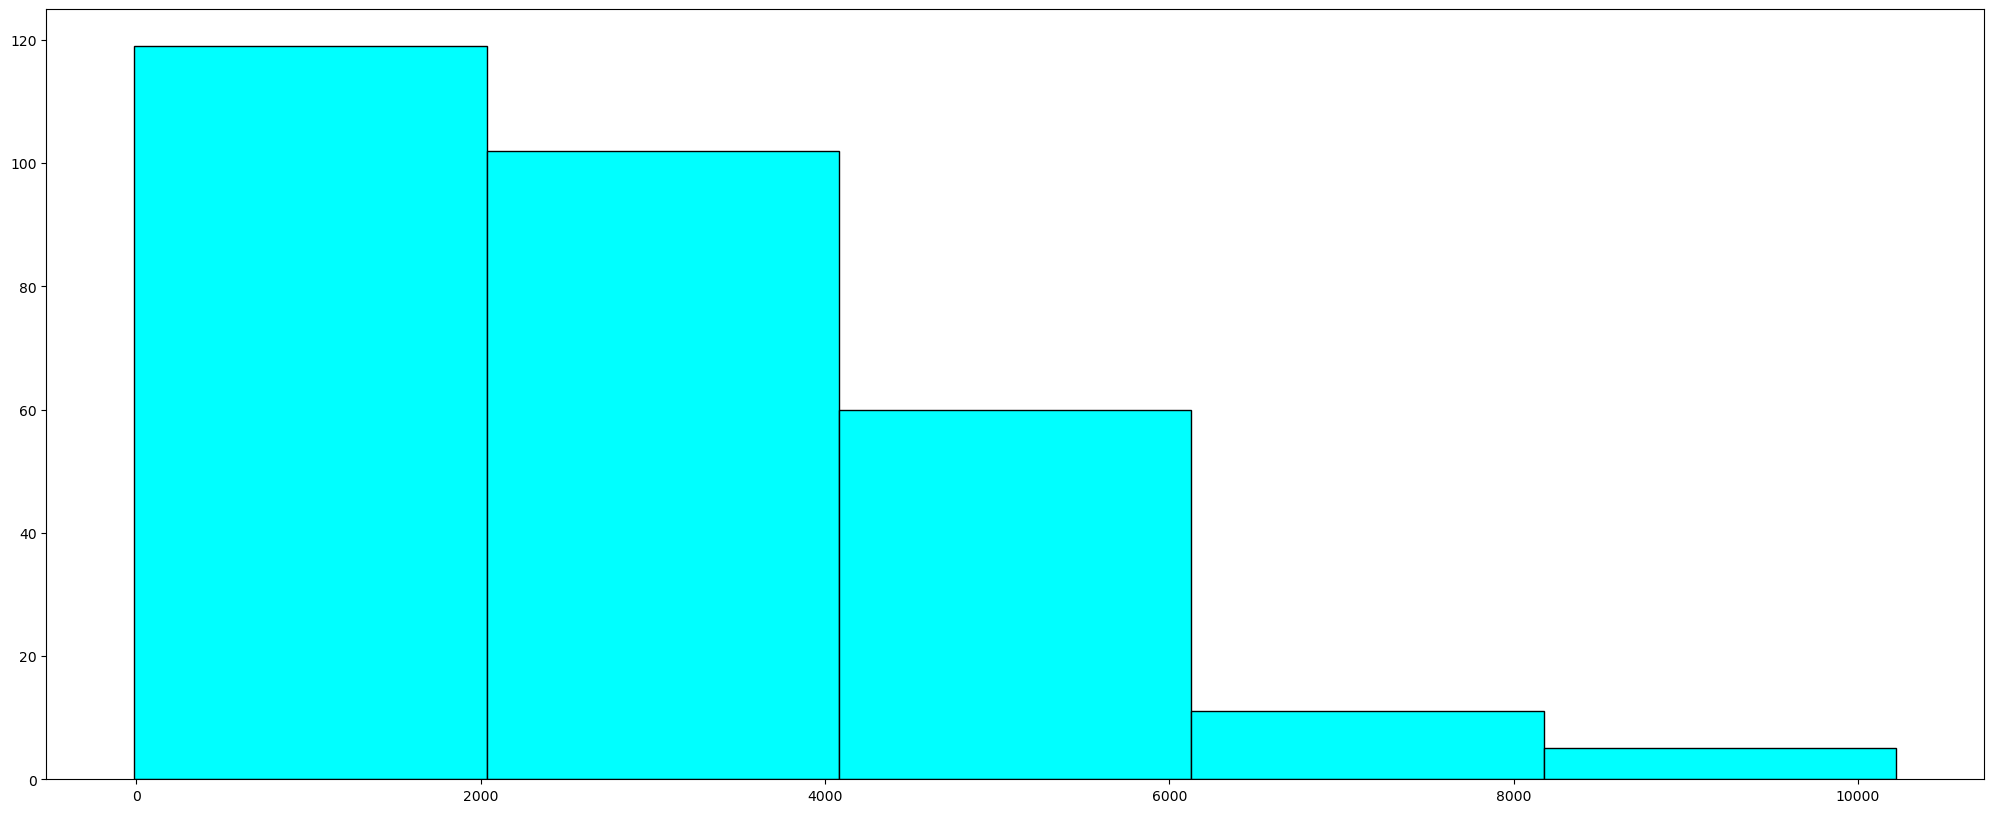

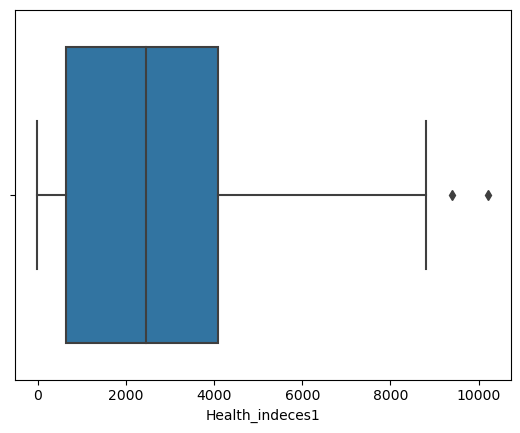

Description of Health_indices2
----------------------------------------------------------------------------
count     297.000000
mean      693.632997
std       468.944354
min         0.000000
25%       175.000000
50%       810.000000
75%      1073.000000
max      1508.000000
Name: Health_indices2, dtype: float64 Distribution of Health_indices2
----------------------------------------------------------------------------
BoxPlot of Health_indices2
----------------------------------------------------------------------------


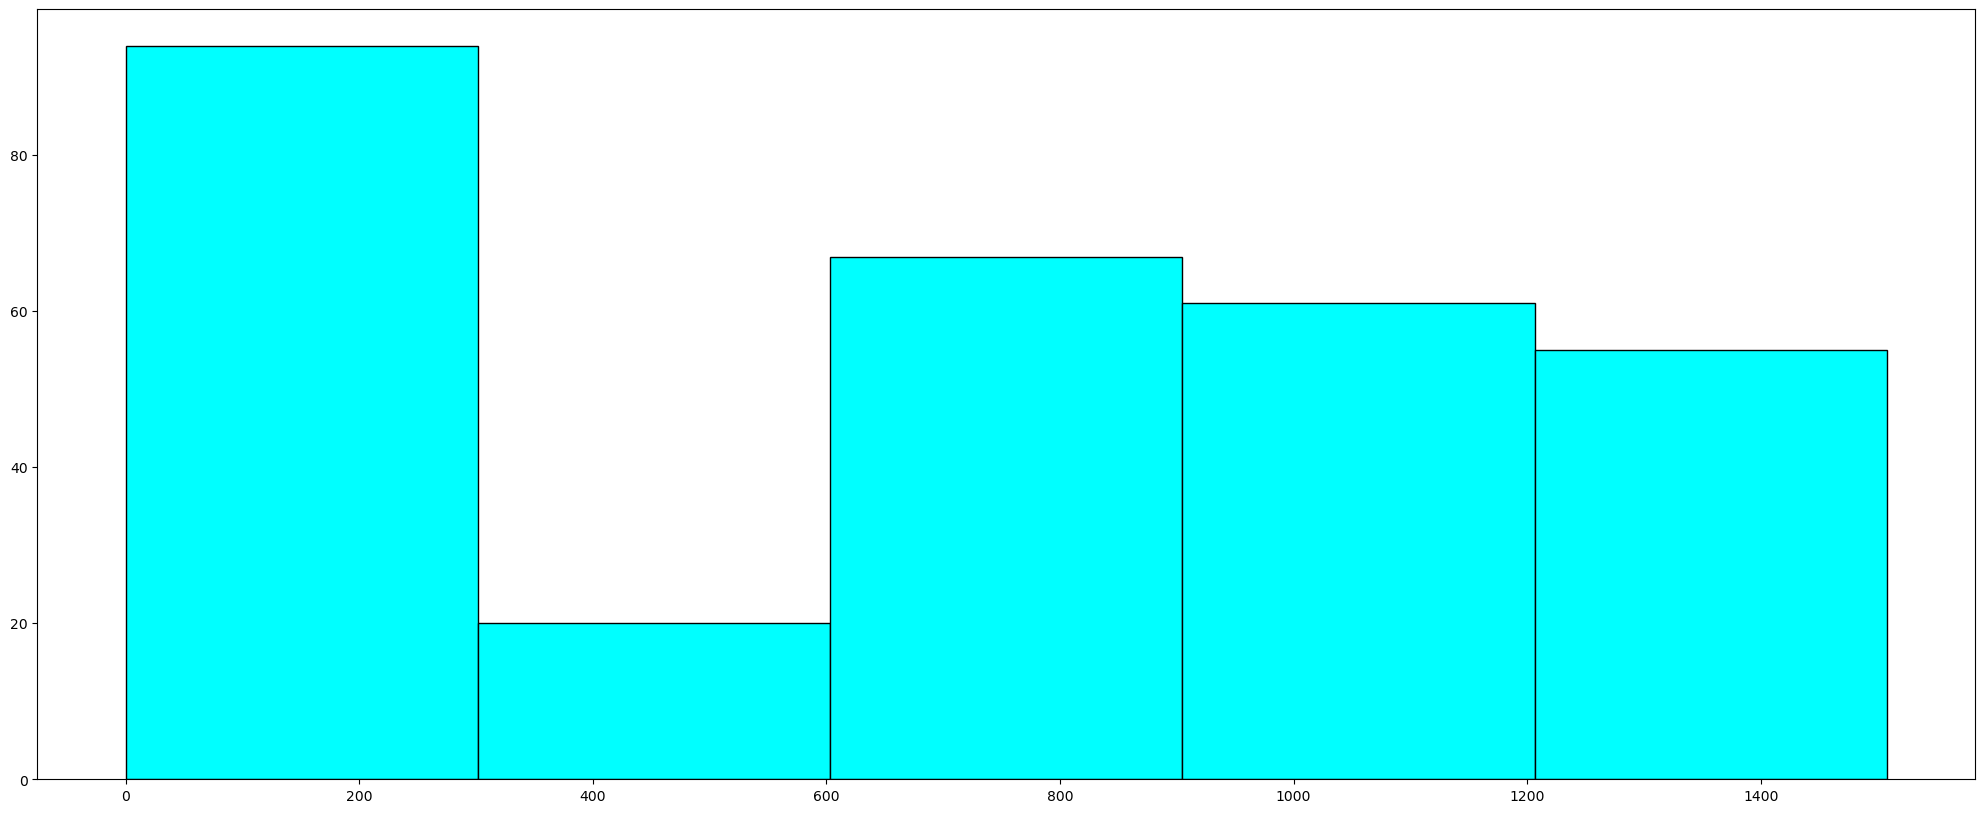

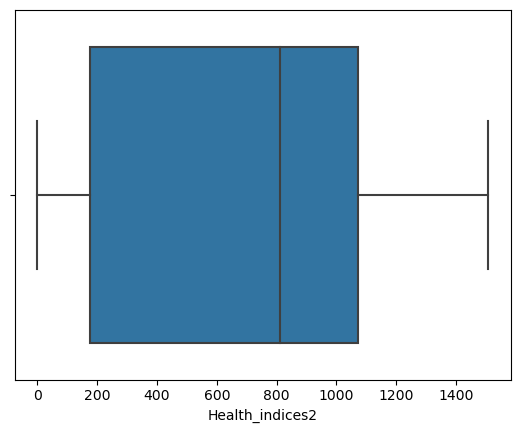

Description of Per_capita_income
----------------------------------------------------------------------------
count     297.000000
mean     2156.915825
std      1491.854058
min       500.000000
25%       751.000000
50%      1865.000000
75%      3137.000000
max      7049.000000
Name: Per_capita_income, dtype: float64 Distribution of Per_capita_income
----------------------------------------------------------------------------
BoxPlot of Per_capita_income
----------------------------------------------------------------------------


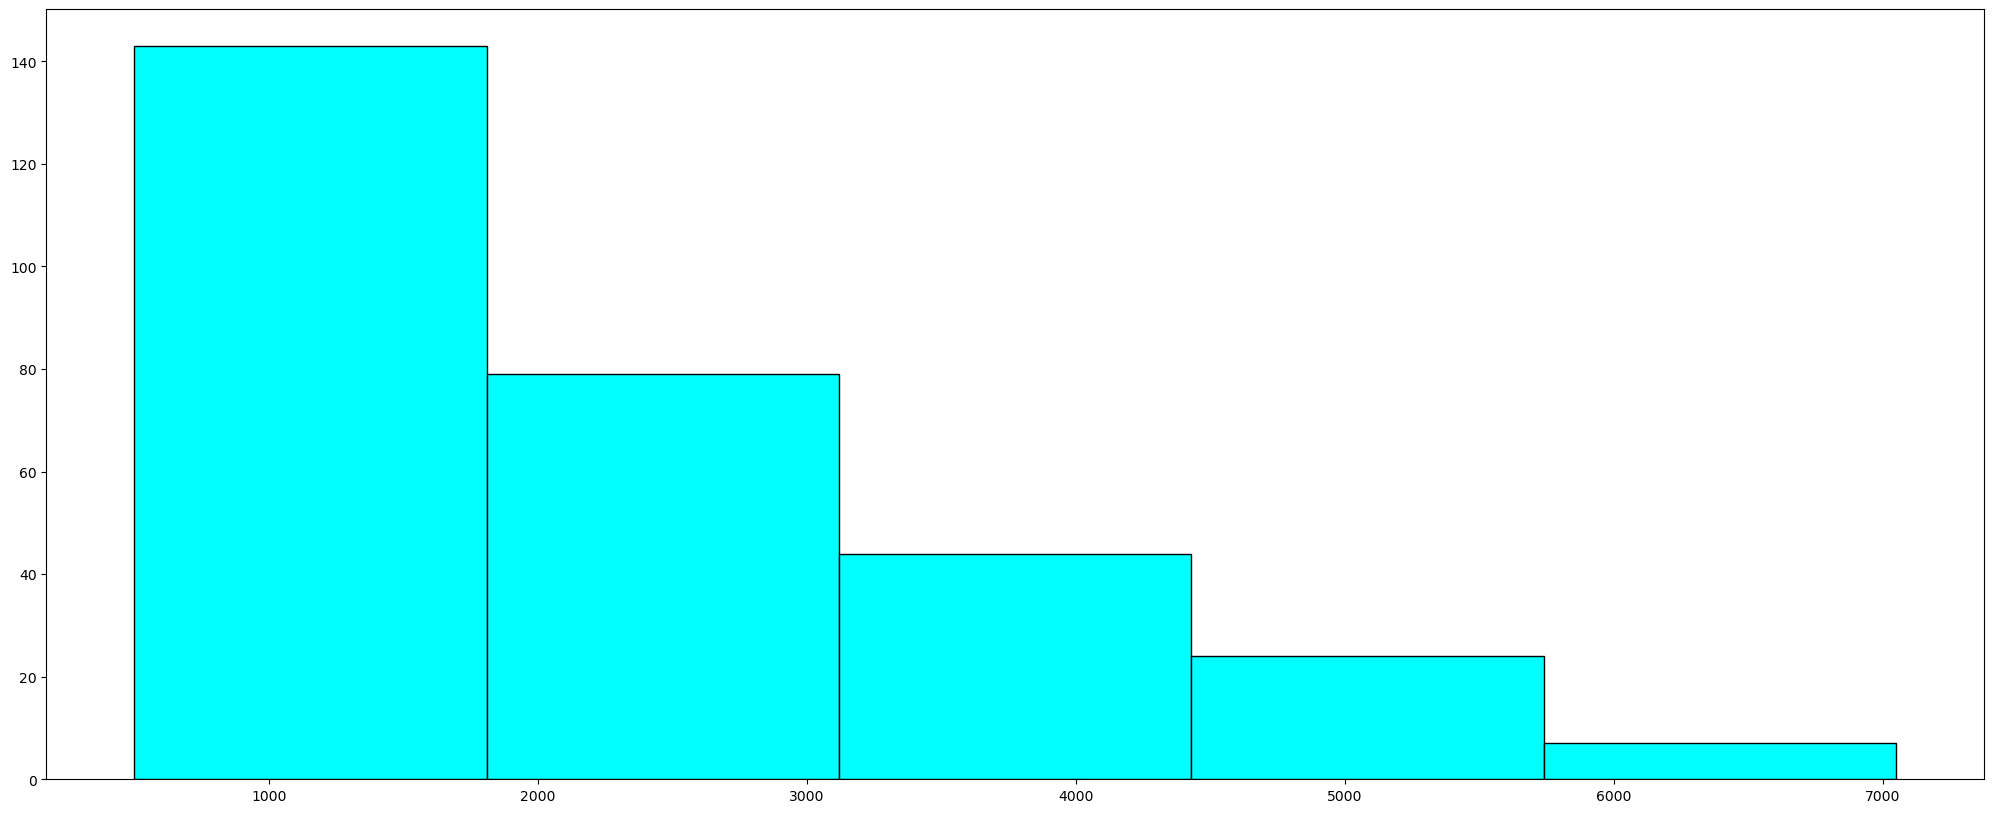

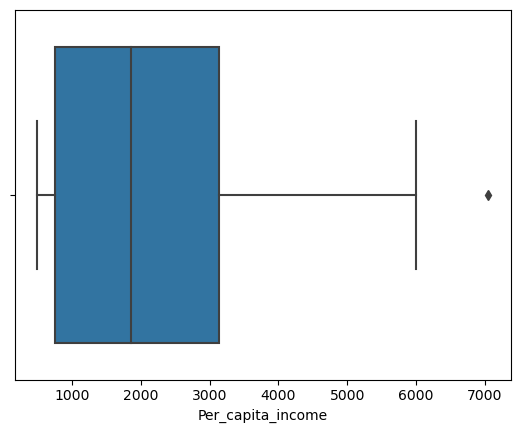

Description of GDP
----------------------------------------------------------------------------
count       297.000000
mean     174601.117845
std      167167.992863
min          22.000000
25%        8721.000000
50%      137173.000000
75%      313092.000000
max      728575.000000
Name: GDP, dtype: float64 Distribution of GDP
----------------------------------------------------------------------------
BoxPlot of GDP
----------------------------------------------------------------------------


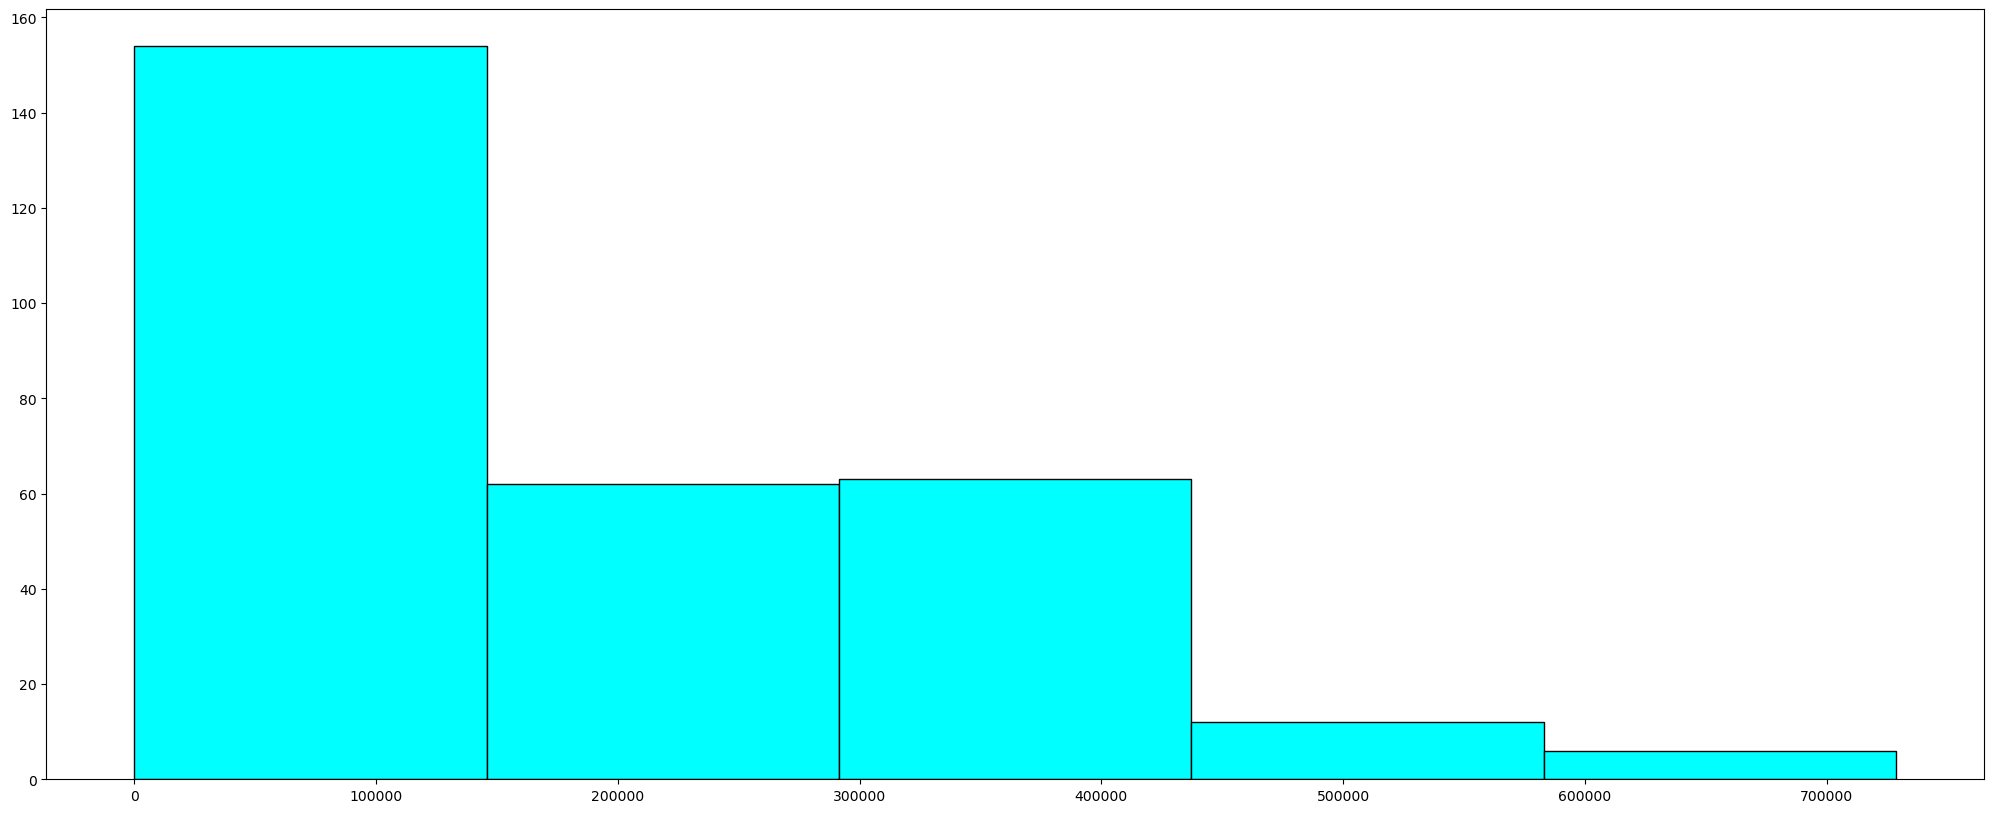

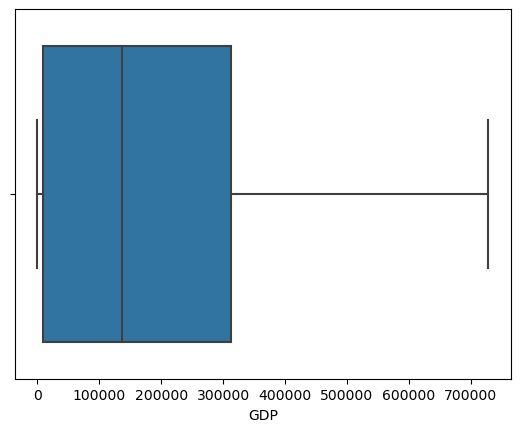

In [13]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,5)

In [14]:
q1 = df.quantile(0.25)
q2 = df.quantile(0.75)

In [15]:
IQR = q2 - q1

In [16]:
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)

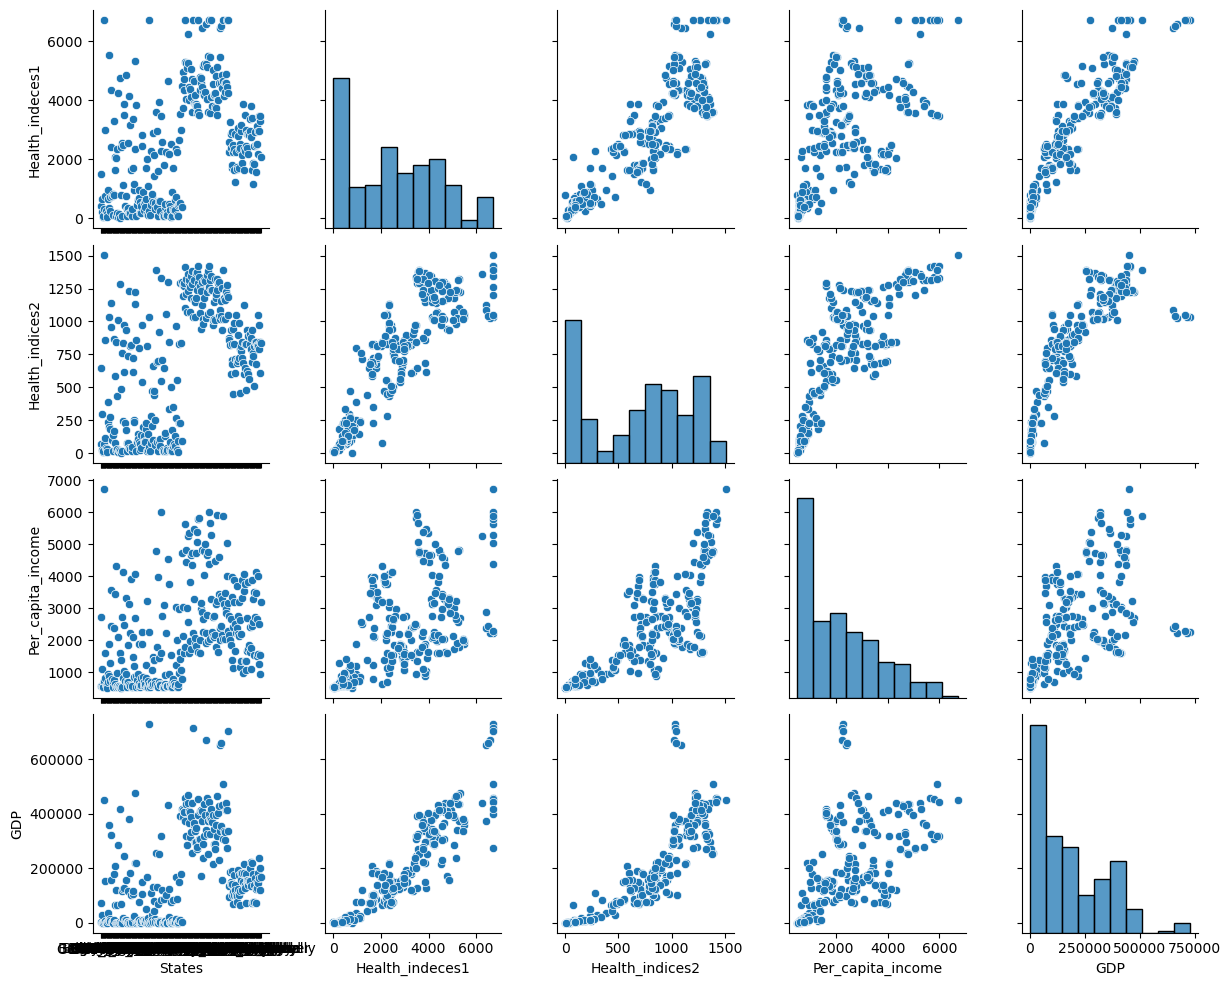

In [25]:
for i in range(0, len(df.columns),5):
    sns.pairplot(data=df,x_vars=df.columns[i:i+5])


In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [18]:
lr,ur=remove_outlier(df['Health_indeces1'])
print("lower range",lr, "and upper range", ur)

lower range -4538.5 and upper range 9273.5


In [19]:
lr,ur=remove_outlier(df['Per_capita_income'])
print("lower range",lr, "and upper range", ur)

lower range -2828.0 and upper range 6716.0


In [20]:
df['Health_indeces1']=np.where(df['Health_indeces1']>ur,ur,df['Health_indeces1'])
df['Health_indeces1']=np.where(df['Health_indeces1']<lr,lr,df['Health_indeces1'])

In [21]:
df['Per_capita_income']=np.where(df['Per_capita_income']>ur,ur,df['Per_capita_income'])
df['Per_capita_income']=np.where(df['Per_capita_income']<lr,lr,df['Per_capita_income'])

<Axes: xlabel='Per_capita_income'>

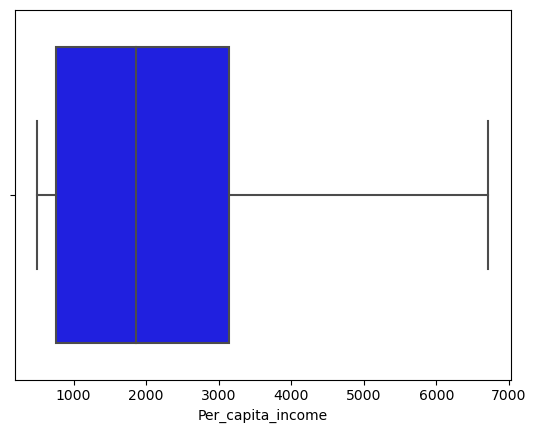

In [22]:
sns.boxplot(data=df,x='Per_capita_income',color='BLUE')


<Axes: xlabel='Health_indeces1'>

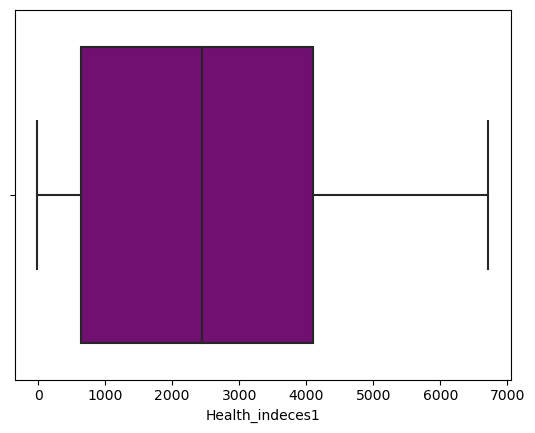

In [23]:
sns.boxplot(data=df,x='Health_indeces1',color='Purple')


In [24]:
df.skew()

Health_indeces1      0.334378
Health_indices2     -0.173803
Per_capita_income    0.808296
GDP                  0.829665
dtype: float64

In [26]:
df.corr()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Health_indeces1,1.00000,0.887970,0.649780,0.927470
Health_indices2,0.88797,1.000000,0.812186,0.869385
Per_capita_income,0.64978,0.812186,1.000000,0.629663
GDP,0.92747,0.869385,0.629663,1.000000


In [27]:
df.cov()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Health_indeces1,3.616758e+06,7.919162e+05,1.839129e+06,2.948580e+08
Health_indices2,7.919162e+05,2.199088e+05,5.668432e+05,6.815322e+07
Per_capita_income,1.839129e+06,5.668432e+05,2.214995e+06,1.566562e+08
GDP,2.948580e+08,6.815322e+07,1.566562e+08,2.794514e+10


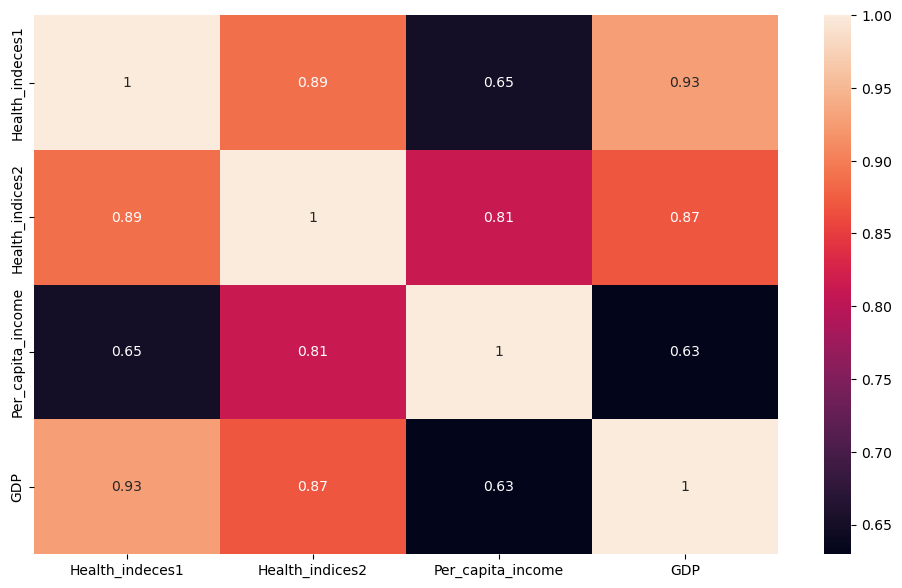

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True);

In [29]:
df.isnull().sum()

States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
X = StandardScaler()

In [33]:
# Scale the data using z-score scaling
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:5]),columns=df.columns[1:5])
data_scaled

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.138661,-1.340654,-1.071354,-1.035304
1,-0.576133,-0.101746,0.373007,-0.604838
2,-1.013831,-0.842955,-0.707908,-0.882536
3,-1.257171,-1.428232,-1.065297,-1.044730
4,-1.335651,-1.464545,-1.095584,-1.046096
...,...,...,...,...
292,0.455167,0.590333,0.230994,0.383704
293,0.202346,0.212253,-0.604932,-0.070528
294,0.367206,-0.180780,-0.426574,-0.326073
295,0.465701,0.327599,-0.822326,0.148615


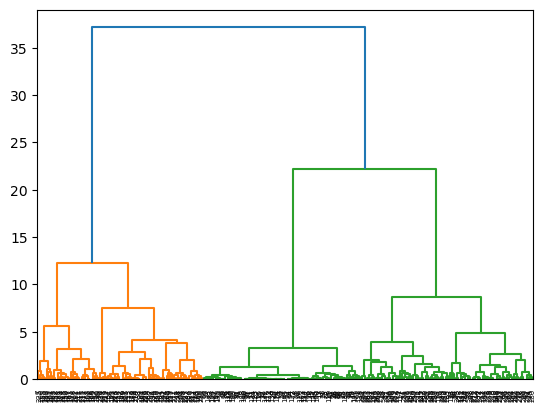

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform linkage
linkage_matrix = linkage(data_scaled, method='ward',metric = "euclidean")

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.show()


In [35]:
linkage_matrix

array([[5.00000000e+00, 5.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.84000000e+02, 2.30000000e+02, 5.99210260e-06, 2.00000000e+00],
       [2.47000000e+02, 2.56000000e+02, 2.13604824e-03, 2.00000000e+00],
       ...,
       [5.87000000e+02, 5.88000000e+02, 1.22818881e+01, 9.90000000e+01],
       [5.82000000e+02, 5.89000000e+02, 2.21536701e+01, 1.98000000e+02],
       [5.90000000e+02, 5.91000000e+02, 3.71688970e+01, 2.97000000e+02]])

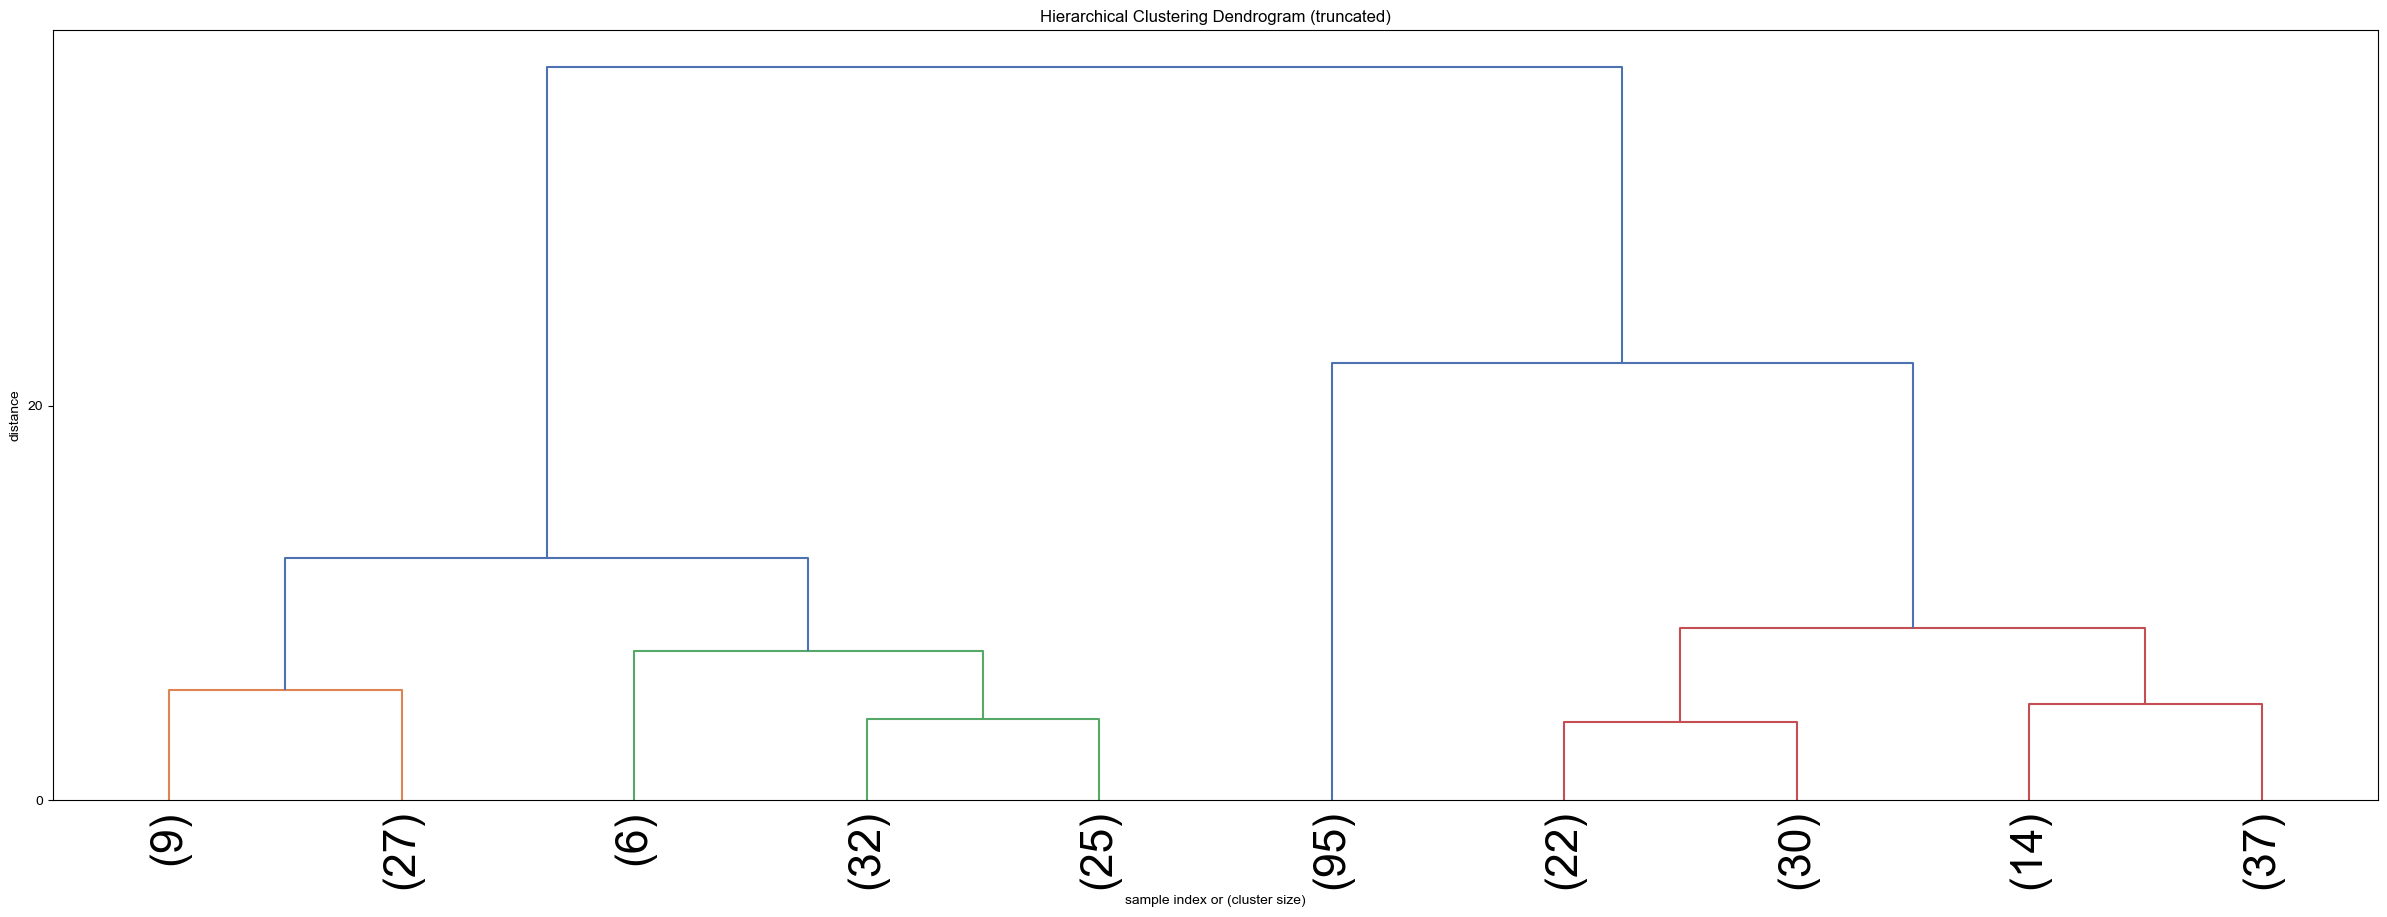

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(30, 10))
Z_Final = linkage(data_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=32,
    color_threshold=10 
)
sns.set(font_scale=8);
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler


In [38]:
wss =[] 


In [39]:
from sklearn.cluster import KMeans 


In [40]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)


In [41]:
wss

[1188.0,
 455.29129911020243,
 244.47930171964813,
 168.20705625177374,
 133.7467703918479,
 106.23235342467379,
 90.67213692538147,
 79.40258262639014,
 70.72722521337673,
 63.082384046707325]

In [42]:
KM.inertia_


63.082384046707325

In [57]:
import numpy as np
a=np.arange(1,11)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

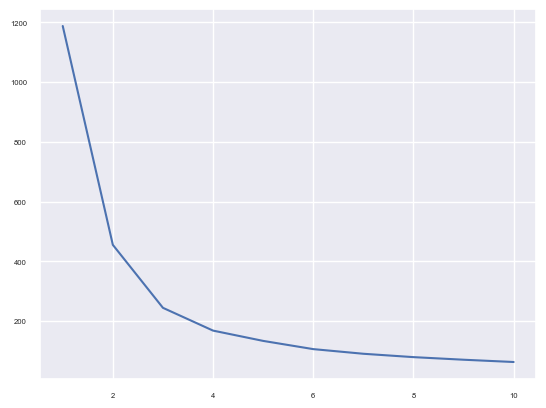

In [58]:
plt.plot(range(1,11), wss)



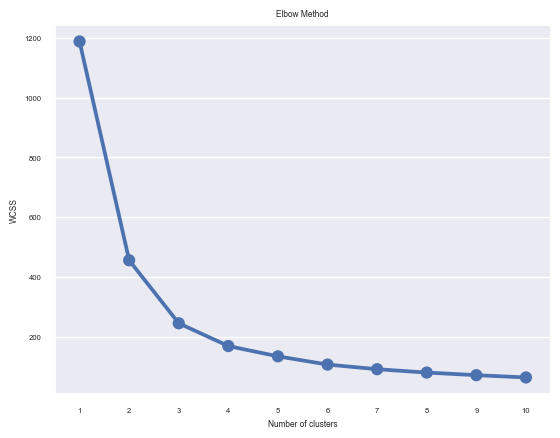

In [59]:
sns.pointplot(x=a, y=wss)
sns.set(font_scale=0.5);
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [46]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_scores = []


In [48]:
for i in range(2, 11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(data_scaled)
    labels = KM.labels_
    silhouette_scores.append(silhouette_score(data_scaled,labels,random_state=1))

In [49]:
silhouette_scores

[0.5337921355008507,
 0.5414933372475436,
 0.5585921135132221,
 0.5263164972079487,
 0.5465444819504095,
 0.5508371876705965,
 0.526060813993696,
 0.5109978994519919,
 0.4966104843213452]

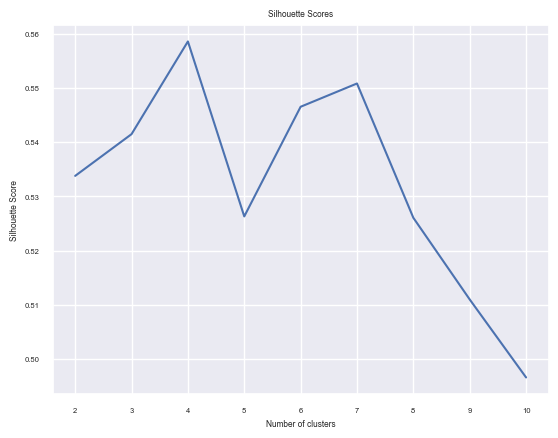

In [50]:
# Plot the silhouette scores
plt.plot(range(2,11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [67]:
df["Clus_kmeans3"] = labels
df.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Clus_kmeans5,cluster,Clus_kmeans3
0,Bachevo,417.0,66,564.0,1823,2,2,2
1,Balgarchevo,1485.0,646,2710.0,73662,3,0,3
2,Belasitsa,654.0,299,1104.0,27318,2,2,2
3,Belo_Pole,192.0,25,573.0,250,2,2,2
4,Beslen,43.0,8,528.0,22,2,2,2


In [63]:
df.Clus_kmeans3.value_counts().sort_index()

0    19
1    23
2    94
3    29
4    25
5    32
6     6
7    30
8     9
9    30
Name: Clus_kmeans3, dtype: int64

In [64]:
# Perform KMeans with the optimum number of clusterskmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=1)
kmeans

KMeans(n_clusters=3, random_state=1)

In [65]:
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=1)

In [66]:
df['cluster'] = kmeans.labels_
df['cluster']

0      2
1      0
2      2
3      2
4      2
      ..
292    0
293    0
294    0
295    0
296    0
Name: cluster, Length: 297, dtype: int32

In [68]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)

In [69]:
clust_profile=df
clust_profile=clust_profile.groupby('Clus_kmeans5').mean()
clust_profile['freq']=df.Clus_kmeans5.value_counts().sort_index()
clust_profile

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster,Clus_kmeans3,freq
Clus_kmeans5,,,,,,,
0,1957.736842,505.947368,1451.736842,75629.157895,0.631579,0.0,19
1,4700.434783,1189.130435,3150.130435,381874.304348,1.000000,1.0,23
2,404.680851,96.734043,668.691489,5359.744681,2.000000,2.0,94
3,1872.000000,793.724138,3596.310345,133221.344828,0.000000,3.0,29
4,4059.520000,1316.440000,4941.440000,342414.080000,1.000000,4.0,25
5,4499.718750,1135.000000,1923.000000,353950.781250,1.000000,5.0,32
6,6606.833333,1044.000000,2299.833333,687649.666667,1.000000,6.0,6
7,2977.300000,908.033333,2652.033333,158369.400000,0.000000,7.0,30
8,6662.444444,1369.666667,5555.444444,426759.111111,1.000000,8.0,9


In [70]:
kmeans.fit(data_scaled)

KMeans(n_clusters=5, random_state=1)

In [71]:
df['cluster'] = kmeans.labels_

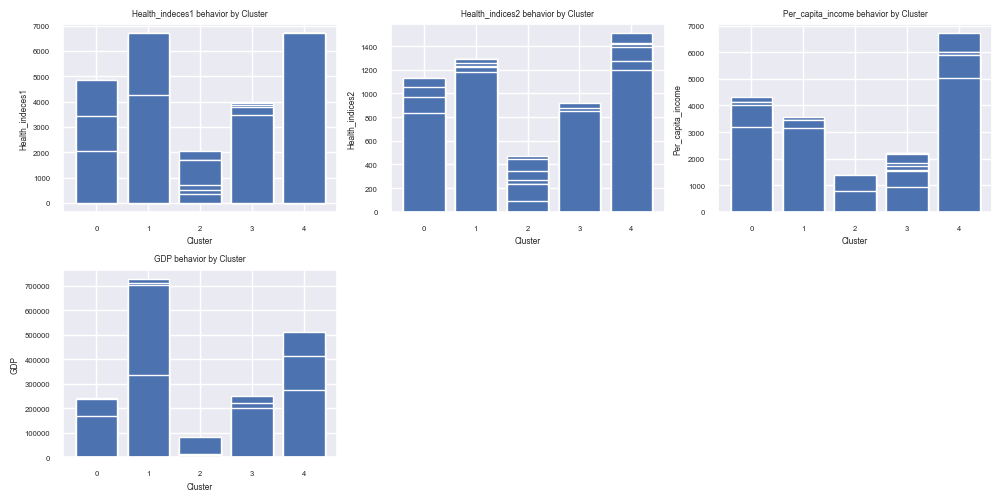

In [74]:
plt.figure(figsize=(10,5))
sns.set(font_scale=0.5);

plt.grid(False)
plt.subplot(2,3,1)

plt.bar(df['cluster'], df['Health_indeces1'])

plt.xlabel('Cluster')

plt.ylabel('Health_indeces1')

plt.title('Health_indeces1 behavior by Cluster')

plt.subplot(2,3,2)

plt.bar(df['cluster'], df['Health_indices2'])

plt.xlabel('Cluster')

plt.ylabel('Health_indices2')

plt.title('Health_indices2 behavior by Cluster')
plt.subplot(2,3,3)

plt.bar(df['cluster'], df['Per_capita_income'])

plt.xlabel('Cluster')

plt.ylabel('Per_capita_income')

plt.title('Per_capita_income behavior by Cluster')
plt.subplot(2,3,4)

plt.bar(df['cluster'], df['GDP'])

plt.xlabel('Cluster')

plt.ylabel('GDP')

plt.title('GDP behavior by Cluster')







plt.tight_layout()

plt.show()
